

## Problemas de clasificación binaria, la regresión logística y una implementación con funciones


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [20]:
x0 = 4; y0 = 4
x1 = 4; y1 = 4
radio_0 = 2
radio_1 = 4

angle = np.arange(0, np.pi*2, 0.05)
r0 = radio_0 * np.random.rand(angle.shape[0])
r1 = radio_1 * (np.random.rand(angle.shape[0]) + 1)

x_int = r0 * np.cos(angle) + x0
y_int = r0 * np.sin(angle) + y0

x_ext = r1 * np.cos(angle) + x1
y_ext = r1 * np.sin(angle) + y1

z_int = np.zeros(x_ext.shape[0])
z_ext = np.ones(x_ext.shape[0])

In [21]:
m = angle.shape[0] # cantidad de muestras
n = 5              # cantidad de variables
print(m, n)

126 5


In [22]:
x = np.concatenate( (x_int, x_ext) , axis = 0 )
y = np.concatenate( (y_int, y_ext) , axis = 0 )
x_2 = x**2
y_2 = y**2
z = np.concatenate( (z_int, z_ext) , axis = 0 )

X = (np.vstack((x,y,x_2,y_2))).T
print(X.shape)

Y = np.transpose(z)
print(Y.shape[0])


(252, 4)
252


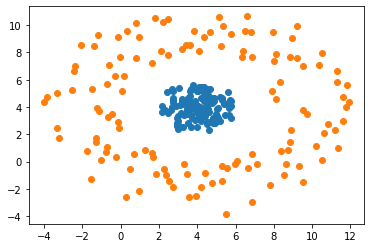

In [5]:
plt.plot(x_int, y_int, 'o')
plt.plot(x_ext, y_ext, 'o')

In [23]:
X_train, X_eval, y_train, y_eval = train_test_split(X, Y, test_size=0.25, random_state=50)
print("Train Data shape: " + str(X_train.shape))
print("Train Labels shape: " + str(y_train.shape))
print("Evaluation Data shape: " + str(X_eval.shape))
print("Evaluation Labels shape: " + str(y_eval.shape))

Train Data shape: (189, 4)
Train Labels shape: (189,)
Evaluation Data shape: (63, 4)
Evaluation Labels shape: (63,)


In [24]:
X_train = X_train.T
X_eval = X_eval.T
y_train = y_train.T
y_eval = y_eval.T
print("Train Data shape: " + str(X_train.shape))
print("Train Labels shape: " + str(y_train.shape))
print("Evaluation Data shape: " + str(X_eval.shape))
print("Evaluation Labels shape: " + str(y_eval.shape))

Train Data shape: (4, 189)
Train Labels shape: (189,)
Evaluation Data shape: (4, 63)
Evaluation Labels shape: (63,)


In [25]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))   
    
    return s

In [26]:
def initialize_parameters(dim):
    
    """"
    This function creates a vector of zeros with shape (dim, 1) for w and initialize b to 0.
    
    Arguments:
        dim -- Number of dimentions or features in this case
    
    Return:
        parameters -- python dictionary containing your parameters:
                    w -- weight matrix of shape (dim, 1)
                    b -- bias of value 0
        
    """
    
    w = np.zeros((dim, 1), dtype = float)
    b = 0
    
    return w, b

In [27]:
def propagate(w, b, X, Y, lambd):
    
    
    """
    This function compute the cost and gradient of the propogation
    Arguments:
        w -- weights, a numpy array of size (no. of features, 1)
        b -- bias, a scalar
        X -- data of size(no. of features, no. of examples)
        Y -- output labels of size(1, no. of examples)
        
    return:
        grads -- dictionary contain the gradient of weights vector and biases with keys dw and db respectively
        cost -- computed cost over all examples
    """
    m = Y.shape[0]  # number of examples
    A = sigmoid(np.dot(w.T, X) + b) # A is of shape(1, m)
    
    cross_entropy_cost = -(np.dot(np.log(A), Y.T) + np.dot(np.log(1 - A), (1 - Y.T)))/m
    L2_regularization_cost = (np.sum(np.square(w))) * (lambd / (2 * m))
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    dw = np.dot(X, (A-Y).T)/m + (lambd/m * w)
    db = np.sum(np.array([A-Y]))/m
    
    grads = {"dw": dw,
             "db": db}
    cost = np.squeeze(cost)    
        
    return grads, cost

In [28]:
def optimize(w, b, X, Y, num_iterations, learning_rate, lambd, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
        w -- weights, a numpy array of size (no. of features,, 1)
        b -- bias, a scalar
        X -- data of shape (no. of features, number of examples)
        Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        lambd -- lambda for regularization
        print_cost -- True to print the loss every 100 steps
    
    Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """
    
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y, lambd)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [29]:
def predict(w, b, X):
    """
     Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
        w -- weights, a numpy array of size (no. of features, 1)
        b -- bias, a scalar
        X -- data of size (no. of features, number of examples)
    
    Returns:
        Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    m = X.shape[1]
    Y_pred = np.zeros((1, m))

    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range (A.shape[1]):
        
        if(A[0, i] <= 0.5):
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
    return Y_pred

In [30]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, lambd=0.7, 
          learning_rate = 0.5, print_cost = False):
    
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
        X_train -- training set represented by a numpy array of shape (no. of features, m_train)
        Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        X_test -- test set represented by a numpy array of shape (no. of features, m_test)
        Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        lambd -- lambda for regularization
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
        print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
        d -- dictionary containing information about the model.
    """
    w, b = initialize_parameters(X_train.shape[0])
    
    param, grads, costs = optimize(w, b, X_train, Y_train, num_iterations,
                                   learning_rate, lambd, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = param["w"]
    b = param["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("Train Accuracy {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100 ))
    print("Test Accuracy {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100 ))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.172211
Cost after iteration 2000: 0.141048
Cost after iteration 3000: 0.122709
Cost after iteration 4000: 0.109222
Cost after iteration 5000: 0.098547
Cost after iteration 6000: 0.089795
Cost after iteration 7000: 0.082464
Cost after iteration 8000: 0.076228
Cost after iteration 9000: 0.070858
Train Accuracy 97.88359788359789 %
Test Accuracy 98.41269841269842 %


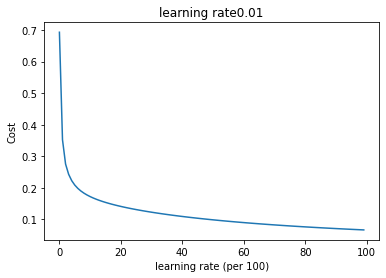

In [31]:
result = model(X_train, y_train, X_eval, y_eval, num_iterations = 10000, 
               learning_rate = 0.01, lambd = 0, print_cost = True)

cost = np.squeeze(result['costs'])
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('learning rate (per 100)')
plt.title('learning rate' + str(result['learning_rate']))
plt.show()

In [15]:
print("Evaluation Report:")
print(classification_report(y_eval.T, result['Y_prediction_test'].T)) 
# most sklearn functions expacts input in the shape(no. of examples, no.of features)

Evaluation Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        34
         1.0       1.00      0.90      0.95        29

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



Learning Rate is: 0.01
Train Accuracy 95.76719576719577 %
Test Accuracy 95.23809523809524 %

-------------------------------------------------------

Learning Rate is: 0.001
Train Accuracy 92.5925925925926 %
Test Accuracy 93.65079365079364 %

-------------------------------------------------------

Learning Rate is: 0.0001
Train Accuracy 92.5925925925926 %
Test Accuracy 92.06349206349206 %

-------------------------------------------------------



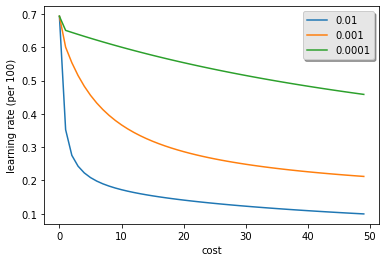

In [32]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("Learning Rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_eval, y_eval, num_iterations = 5000, lambd = 0, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']), label = str(models[str(i)]['learning_rate']))
    
plt.xlabel('cost')
plt.ylabel('learning rate (per 100)')

legend = plt.legend(loc = 'upper right', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [33]:
print(result["w"])
print(result["b"])

[[-1.86999586]
 [-2.38559489]
 [ 0.29597101]
 [ 0.34130894]]
2.7480329293812544


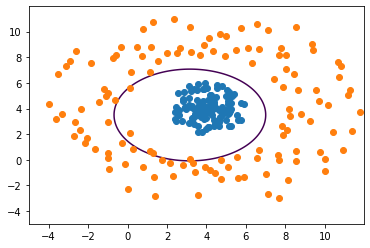

In [34]:
from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(-5.0, 12.0, delta)
yrange = arange(-5.0, 12.0, delta)
XX, YY = meshgrid(xrange,yrange)

ecuacion = result["b"] + result["w"][0]*XX + result["w"][1]*YY + result["w"][2] * (XX**2) + result["w"][3] * (YY**2)

plt.contour(XX, YY, ecuacion, [0])
plt.plot(x_int, y_int, 'o')
plt.plot(x_ext, y_ext, 'o')